In [1]:
import sys
module_path = os.path.abspath('..')
sys.path.append(module_path)
from lc.measurements import CurveMeasurements
from lc.curve import LearningCurveEstimator
import matplotlib
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

Load error measurements using `CurveMeasurements`. See `notebooks/measurements.ipynb` for more about reading error measurements.  

In [2]:
curvems = CurveMeasurements()
curvems.load_from_json('../data/no_pretr_ft.json')
print(curvems)

--
num_train_samples: 25
test_errors: [74.04, 74.48, 74.07, 74.4, 75.95, 74.97, 74.02, 75.8, 74.6, 74.27]
num_ms: 10
--
num_train_samples: 50
test_errors: [57.59, 58.45, 58.13, 58.44, 59.46, 58.14, 58.71, 58.22]
num_ms: 8
--
num_train_samples: 100
test_errors: [45.01, 43.64, 45.06, 44.63]
num_ms: 4
--
num_train_samples: 200
test_errors: [35.36, 35.2]
num_ms: 2
--
num_train_samples: 400
test_errors: [27.92]
num_ms: 1
--



Load default config. Modify `config.yaml` directly or update parameters once loaded. 

In [3]:
cfg = OmegaConf.load('../lc/config.yaml')
print('-'*20)
print('Default config')
print('-'*20)
print(OmegaConf.to_yaml(cfg))

cfg.gamma_search = False
print('-'*20)
print('Modified config')
print('-'*20)
print(OmegaConf.to_yaml(cfg))

--------------------
Default config
--------------------
gamma: -0.5
gamma_search: true
gamma_range:
- -1.0
- 0
search_reg_coeff: 5
normalize_objective: false
variance_type: smooth
ddof: 1
v_0: 0.01
min_n: 20
'N': 400
num_interp_pts: 100
marker_size: 20

--------------------
Modified config
--------------------
gamma: -0.5
gamma_search: false
gamma_range:
- -1.0
- 0
search_reg_coeff: 5
normalize_objective: false
variance_type: smooth
ddof: 1
v_0: 0.01
min_n: 20
'N': 400
num_interp_pts: 100
marker_size: 20



In [4]:
curve_estimator = LearningCurveEstimator(cfg)
curve, objective = curve_estimator.estimate(curvems)
print('Quality of the fit:',objective)
curve.print_summary(cfg.N)

Quality of the fit: 17.3783
------------------------------
Learning curve summary
------------------------------
error_400: 28.227
beta_400: 16.0567
gamma: -0.5
alpha: 12.1703
eta: 321.1342


Searching for gamma leads to better fit. To enable gamma search set `gamma_search` to `True` (default). When gamma search is disabled, `curve_estimator.estimate()` uses `cfg.gamma` to estimate the curve. 

In [5]:
cfg.gamma_search = True
curve, objective = curve_estimator.estimate(curvems)
print('Quality of the fit:',objective)
curve.print_summary(cfg.N)

Quality of the fit: 6.4696
------------------------------
Learning curve summary
------------------------------
error_400: 27.9145
beta_400: 18.2268
gamma: -0.41
alpha: 5.6867
eta: 259.2632


Use `curve_estimator.plot()` to visualizes the learning curve and the error measurements.  

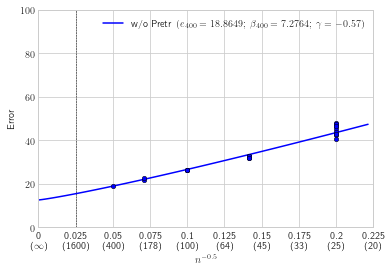

In [9]:
curve_estimator.plot(curve,curvems,label='w/o Pretr',color='b')

You may also want to visualize the variance estimates. We recommend using the smoothed variance estimate but you can switch to using sample variance for curve estimation by setting `cfg.variance_type='sample'`. See `notebooks/variance.ipynb` for details on smooth variance estimation. 

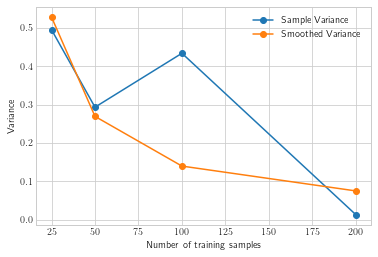

In [7]:
curve_estimator.err_mean_var_estimator.visualize(curvems)

Plot multiple curves for easy comparison.

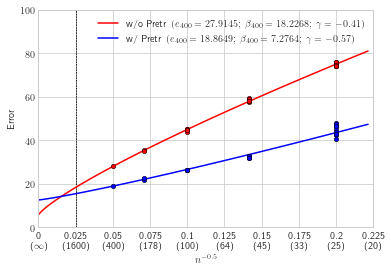

In [8]:
plot_metadata = [
    ['../data/no_pretr_ft.json','w/o Pretr','r'],
    ['../data/pretr_ft.json','w/ Pretr','b'],
]
for (json_path,label,color) in plot_metadata:
    curvems.load_from_json(json_path)
    curve, _ = curve_estimator.estimate(curvems)
    curve_estimator.plot(curve,curvems,label,color)